In [1]:
import os
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
geo=pd.read_csv('Geo_scores.csv')
instance=pd.read_csv('instance_scores.csv')
qset=pd.read_csv('Qset_tats.csv')
lmbda=pd.read_csv('Lambda_wts.csv')
train=pd.read_csv('train.csv')
test=pd.read_csv('test_share.csv')

In [3]:
geo

,id,geo_score
0,26674,4.48
1,204314,4.48
2,176521,5.17
3,48812,-2.41
4,126870,6.55
...,...,...
1424030,107880,1.03
1424031,282410,8.62
1424032,209634,-1.72
1424033,211652,-10.00


In [4]:
instance

,id,instance_scores
0,173444,-0.88
1,259378,1.50
2,161170,0.44
3,191161,0.76
4,34521,-0.84
...,...,...
1424030,80337,0.20
1424031,216371,0.64
1424032,35358,0.77
1424033,159766,10.56


In [5]:
qset

,id,qsets_normalized_tat
0,9983,2.41
1,266000,3.10
2,77525,1.03
3,160765,-11.63
4,138220,-4.48
...,...,...
1424030,13009,NaN
1424031,147556,-7.24
1424032,143331,10.00
1424033,248231,-7.93


In [6]:
lmbda

,Group,lambda_wt
0,Grp936,3.41
1,Grp347,-2.88
2,Grp188,0.39
3,Grp1053,-2.75
4,Grp56,-0.83
...,...,...
1395,Grp892,4.24
1396,Grp1072,-7.28
1397,Grp785,-2.63
1398,Grp50,0.79


In [7]:
train

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.680000,0.726667,0.606667,1.010000,0.933333,0.603333,0.686667,0.673333,-245.7500,0
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.716667,0.743333,0.680000,0.690000,0.560000,0.670000,0.553333,0.653333,-248.0000,0
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.690000,0.820000,0.600000,0.383333,0.763333,0.670000,0.686667,0.673333,-233.1250,0
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.720000,0.900000,0.680000,0.846667,0.423333,0.520000,0.846667,0.760000,-249.7775,0
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.603333,0.486667,0.693333,0.526667,0.520000,0.716667,0.706667,0.673333,-247.5775,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227840,97346,Grp232,0.476667,1.013333,0.536667,0.576667,1.406667,1.846667,0.600000,1.103333,...,0.683333,0.630000,0.633333,0.996667,0.646667,0.533333,0.680000,0.693333,-246.5025,0
227841,147361,Grp199,1.363333,0.730000,0.060000,0.776667,0.883333,0.466667,0.733333,0.590000,...,0.543333,0.356667,0.766667,0.730000,0.596667,0.730000,0.646667,0.656667,-249.7775,0
227842,50989,Grp36,1.060000,0.756667,0.906667,0.896667,0.503333,0.396667,0.683333,0.620000,...,0.603333,0.510000,0.740000,0.873333,0.700000,0.696667,0.663333,0.673333,-249.7775,0
227843,149780,Grp445,0.433333,1.013333,1.163333,0.940000,0.930000,0.900000,0.813333,0.720000,...,0.606667,0.606667,0.540000,0.643333,0.906667,0.540000,0.766667,0.710000,-242.7500,0


In [8]:
test

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Dem7,Dem8,Dem9,Cred1,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT
0,146574,Grp229,-0.300000,1.540000,0.220000,-0.280000,0.570000,0.260000,0.700000,1.076667,...,0.786667,0.546667,0.313333,0.703333,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500
1,268759,Grp141,0.633333,0.953333,0.810000,0.466667,0.910000,0.253333,1.040000,0.550000,...,0.636667,0.770000,0.993333,0.536667,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125
2,59727,Grp188,1.043333,0.740000,0.860000,1.006667,0.583333,0.616667,0.630000,0.686667,...,0.626667,0.756667,0.953333,0.623333,0.753333,0.870000,0.596667,0.680000,0.670000,-248.1200
3,151544,Grp426,1.283333,0.300000,0.576667,0.636667,0.256667,0.543333,0.356667,0.663333,...,0.480000,0.460000,0.260000,0.800000,0.606667,0.456667,0.320000,0.676667,0.660000,-222.9875
4,155008,Grp443,1.186667,0.326667,0.476667,0.866667,0.436667,0.680000,0.476667,0.686667,...,0.706667,0.740000,0.823333,0.670000,0.896667,0.566667,0.546667,0.650000,0.663333,-196.2200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56957,18333,Grp102,0.553333,1.043333,1.096667,0.686667,0.673333,0.340000,0.900000,0.643333,...,0.700000,0.576667,0.433333,0.660000,0.776667,0.610000,0.690000,0.750000,0.700000,-249.5050
56958,244207,Grp504,1.353333,0.616667,0.276667,0.783333,0.690000,0.650000,0.473333,0.670000,...,0.643333,0.713333,0.870000,0.683333,0.690000,0.640000,0.883333,0.663333,0.660000,-248.7525
56959,103277,Grp78,1.083333,0.433333,0.806667,0.490000,0.243333,0.316667,0.533333,0.606667,...,0.536667,0.433333,0.063333,0.753333,0.780000,0.603333,0.880000,0.643333,0.676667,-231.0500
56960,273294,Grp134,0.566667,1.153333,0.370000,0.616667,0.793333,0.226667,0.910000,0.696667,...,0.643333,0.776667,1.026667,0.626667,0.646667,0.566667,0.616667,0.713333,0.706667,-246.3150


In [9]:
print(geo.info())
print()
print(instance.info())
print()
print(qset.info())
print()
print(lmbda.info())
print()
print(train.info())
print()
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   id         1424035 non-null  int64  
 1   geo_score  1352492 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   id               1424035 non-null  int64  
 1   instance_scores  1424035 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1424035 non-null  int64  
 1   qsets_normalized_tat  1320

In [10]:
print(geo.isnull().sum())
print()
print(instance.isnull().sum())
print()
print(qset.isnull().sum())
print()
print(lmbda.isnull().sum())
print()
print(train.isnull().sum())
print()
print(test.isnull().sum())

id               0
geo_score    71543
dtype: int64

id                 0
instance_scores    0
dtype: int64

id                           0
qsets_normalized_tat    103201
dtype: int64

Group        0
lambda_wt    0
dtype: int64

id                0
Group             0
Per1              0
Per2              0
Per3              0
Per4              0
Per5              0
Per6              0
Per7              0
Per8              0
Per9              0
Dem1              0
Dem2              0
Dem3              0
Dem4              0
Dem5              0
Dem6              0
Dem7              0
Dem8              0
Dem9              0
Cred1             0
Cred2             0
Cred3             0
Cred4             0
Cred5             0
Cred6             0
Normalised_FNT    0
Target            0
dtype: int64

id                0
Group             0
Per1              0
Per2              0
Per3              0
Per4              0
Per5              0
Per6              0
Per7              0
Per8              

In [11]:
print(geo['id'].nunique())
print()
print(instance['id'].nunique())
print()
print(qset['id'].nunique())
print()
print(train['id'].nunique())
print()
print(test['id'].nunique())
print('***********************************************')
print(lmbda['Group'].nunique())
print()
print(train['Group'].nunique())
print()
print(test['Group'].nunique())

284807

284807

284807

227845

56962
***********************************************
1400

1301

915


In [12]:
geo.isnull().sum()/len(geo)*100

id           0.000000
geo_score    5.023964
dtype: float64

In [13]:
qset.isnull().sum()/len(qset)*100

id                      0.000000
qsets_normalized_tat    7.247083
dtype: float64

<Axes: ylabel='geo_score'>

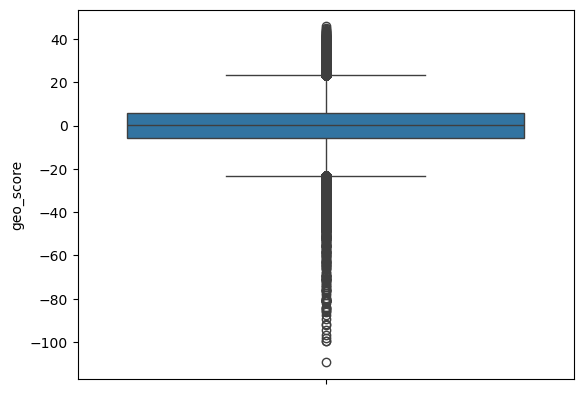

In [14]:
sns.boxplot(y='geo_score',data=geo)

<Axes: ylabel='qsets_normalized_tat'>

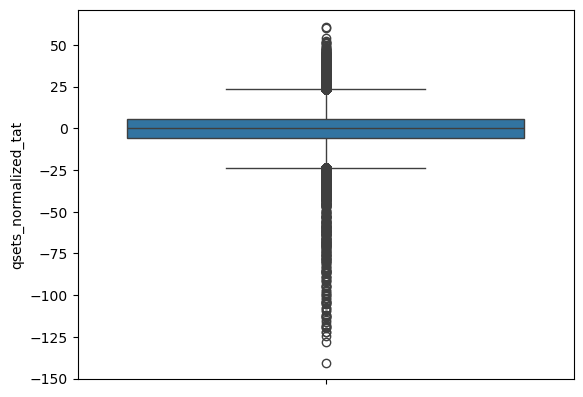

In [15]:
sns.boxplot(y='qsets_normalized_tat',data=qset)

In [16]:
 geo['geo_score']=geo['geo_score'].fillna(geo['geo_score'].median())

In [17]:
geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   id         1424035 non-null  int64  
 1   geo_score  1424035 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB


In [18]:
qset['qsets_normalized_tat']=qset['qsets_normalized_tat'].fillna(qset['qsets_normalized_tat'].median())

In [19]:
qset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1424035 entries, 0 to 1424034
Data columns (total 2 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1424035 non-null  int64  
 1   qsets_normalized_tat  1424035 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 21.7 MB


In [20]:
train['Target'].value_counts()

Target
0    227451
1       394
Name: count, dtype: int64

In [21]:
train['data']='train'
test['data']='test'

In [22]:
#Adding Train and Test Data together 

all_data=pd.concat([train,test],axis=0)

In [23]:
all_data.shape

(284807, 29)

In [24]:
print(geo['id'].nunique())
print()
print(instance['id'].nunique())
print()
print(qset['id'].nunique())
print()
print(all_data['id'].nunique())
print('***********************************************')
print(lmbda['Group'].nunique())
print()
print(all_data['Group'].nunique())


284807

284807

284807

284807
***********************************************
1400

1400


In [25]:
geo=geo.groupby('id').mean()
instance=instance.groupby('id').mean()
qset=qset.groupby('id').mean()

In [26]:
all_data=pd.merge(all_data,lmbda, on='Group', how='left')

In [27]:
all_data=pd.merge(all_data,geo, on='id', how='left')
all_data=pd.merge(all_data,instance, on='id', how='left')
all_data=pd.merge(all_data,qset, on='id', how='left')

In [28]:
all_data

,id,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,...,Cred4,Cred5,Cred6,Normalised_FNT,Target,data,lambda_wt,geo_score,instance_scores,qsets_normalized_tat
0,112751,Grp169,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,...,0.603333,0.686667,0.673333,-245.7500,0.0,train,-0.13,0.256,-0.06,-0.700
1,18495,Grp161,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,...,0.670000,0.553333,0.653333,-248.0000,0.0,train,0.66,-0.250,0.52,0.140
2,23915,Grp261,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,...,0.670000,0.686667,0.673333,-233.1250,0.0,train,-0.51,-0.950,1.56,-0.430
3,50806,Grp198,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,...,0.520000,0.846667,0.760000,-249.7775,0.0,train,0.72,0.490,0.70,-0.302
4,184244,Grp228,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,...,0.716667,0.706667,0.673333,-247.5775,0.0,train,0.60,0.850,-0.47,-0.630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,18333,Grp102,0.553333,1.043333,1.096667,0.686667,0.673333,0.340000,0.900000,0.643333,...,0.690000,0.750000,0.700000,-249.5050,NaN,test,-0.40,-0.114,-0.51,0.010
284803,244207,Grp504,1.353333,0.616667,0.276667,0.783333,0.690000,0.650000,0.473333,0.670000,...,0.883333,0.663333,0.660000,-248.7525,NaN,test,-1.54,0.110,-0.46,0.064
284804,103277,Grp78,1.083333,0.433333,0.806667,0.490000,0.243333,0.316667,0.533333,0.606667,...,0.880000,0.643333,0.676667,-231.0500,NaN,test,0.29,-0.530,0.65,-0.020
284805,273294,Grp134,0.566667,1.153333,0.370000,0.616667,0.793333,0.226667,0.910000,0.696667,...,0.616667,0.713333,0.706667,-246.3150,NaN,test,-0.69,0.270,-0.92,0.610


In [29]:
train=all_data[all_data['data']=='train']
test=all_data[all_data['data']=='test']

In [30]:
train.shape

(227845, 33)

In [31]:
test.shape

(56962, 33)

In [32]:
train.columns

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'Target', 'data', 'lambda_wt', 'geo_score',
       'instance_scores', 'qsets_normalized_tat'],
      dtype='object')

In [33]:
train=train.drop(['id','data'],axis=1)

In [34]:
#Important
train['Group']=train['Group'].astype('category')
train['Group']=train['Group'].cat.codes
train

,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,...,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,Target,lambda_wt,geo_score,instance_scores,qsets_normalized_tat
0,420,1.070000,0.580000,0.480000,0.766667,1.233333,1.993333,0.340000,1.010000,0.863333,...,0.933333,0.603333,0.686667,0.673333,-245.7500,0.0,-0.13,0.256,-0.06,-0.700
1,413,0.473333,1.206667,0.883333,1.430000,0.726667,0.626667,0.810000,0.783333,0.190000,...,0.560000,0.670000,0.553333,0.653333,-248.0000,0.0,0.66,-0.250,0.52,0.140
2,523,1.130000,0.143333,0.946667,0.123333,0.080000,0.836667,0.056667,0.756667,0.226667,...,0.763333,0.670000,0.686667,0.673333,-233.1250,0.0,-0.51,-0.950,1.56,-0.430
3,452,0.636667,1.090000,0.750000,0.940000,0.743333,0.346667,0.956667,0.633333,0.486667,...,0.423333,0.520000,0.846667,0.760000,-249.7775,0.0,0.72,0.490,0.70,-0.302
4,486,0.560000,1.013333,0.593333,0.416667,0.773333,0.460000,0.853333,0.796667,0.516667,...,0.520000,0.716667,0.706667,0.673333,-247.5775,0.0,0.60,0.850,-0.47,-0.630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227840,491,0.476667,1.013333,0.536667,0.576667,1.406667,1.846667,0.600000,1.103333,0.356667,...,0.646667,0.533333,0.680000,0.693333,-246.5025,0.0,0.75,-0.140,-0.44,-0.546
227841,453,1.363333,0.730000,0.060000,0.776667,0.883333,0.466667,0.733333,0.590000,0.806667,...,0.596667,0.730000,0.646667,0.656667,-249.7775,0.0,-0.98,0.426,-0.40,0.384
227842,632,1.060000,0.756667,0.906667,0.896667,0.503333,0.396667,0.683333,0.620000,0.630000,...,0.700000,0.696667,0.663333,0.673333,-249.7775,0.0,0.15,1.066,-0.13,0.010
227843,727,0.433333,1.013333,1.163333,0.940000,0.930000,0.900000,0.813333,0.720000,1.020000,...,0.906667,0.540000,0.766667,0.710000,-242.7500,0.0,1.53,-3.290,-0.66,0.384


In [35]:
test.columns

Index(['id', 'Group', 'Per1', 'Per2', 'Per3', 'Per4', 'Per5', 'Per6', 'Per7',
       'Per8', 'Per9', 'Dem1', 'Dem2', 'Dem3', 'Dem4', 'Dem5', 'Dem6', 'Dem7',
       'Dem8', 'Dem9', 'Cred1', 'Cred2', 'Cred3', 'Cred4', 'Cred5', 'Cred6',
       'Normalised_FNT', 'Target', 'data', 'lambda_wt', 'geo_score',
       'instance_scores', 'qsets_normalized_tat'],
      dtype='object')

In [36]:
test=test.drop(['id','data','Target'],axis=1)

In [37]:
#Important
test['Group']=test['Group'].astype('category')
test['Group']=test['Group'].cat.codes
test

,Group,Per1,Per2,Per3,Per4,Per5,Per6,Per7,Per8,Per9,...,Cred2,Cred3,Cred4,Cred5,Cred6,Normalised_FNT,lambda_wt,geo_score,instance_scores,qsets_normalized_tat
227845,277,-0.300000,1.540000,0.220000,-0.280000,0.570000,0.260000,0.700000,1.076667,0.930000,...,0.813333,0.776667,0.796667,0.823333,0.783333,-249.7500,0.76,0.250,-0.04,-0.426
227846,180,0.633333,0.953333,0.810000,0.466667,0.910000,0.253333,1.040000,0.550000,0.543333,...,0.703333,0.806667,0.630000,0.673333,0.673333,-249.8125,0.18,0.430,-0.77,-0.620
227847,231,1.043333,0.740000,0.860000,1.006667,0.583333,0.616667,0.630000,0.686667,0.593333,...,0.753333,0.870000,0.596667,0.680000,0.670000,-248.1200,0.39,1.320,0.11,-0.406
227848,485,1.283333,0.300000,0.576667,0.636667,0.256667,0.543333,0.356667,0.663333,1.156667,...,0.606667,0.456667,0.320000,0.676667,0.660000,-222.9875,1.80,-2.110,0.33,0.374
227849,504,1.186667,0.326667,0.476667,0.866667,0.436667,0.680000,0.476667,0.686667,1.476667,...,0.896667,0.566667,0.546667,0.650000,0.663333,-196.2200,1.89,-2.110,-0.37,-0.130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,11,0.553333,1.043333,1.096667,0.686667,0.673333,0.340000,0.900000,0.643333,0.543333,...,0.776667,0.610000,0.690000,0.750000,0.700000,-249.5050,-0.40,-0.114,-0.51,0.010
284803,569,1.353333,0.616667,0.276667,0.783333,0.690000,0.650000,0.473333,0.670000,1.023333,...,0.690000,0.640000,0.883333,0.663333,0.660000,-248.7525,-1.54,0.110,-0.46,0.064
284804,765,1.083333,0.433333,0.806667,0.490000,0.243333,0.316667,0.533333,0.606667,0.420000,...,0.780000,0.603333,0.880000,0.643333,0.676667,-231.0500,0.29,-0.530,0.65,-0.020
284805,163,0.566667,1.153333,0.370000,0.616667,0.793333,0.226667,0.910000,0.696667,0.600000,...,0.646667,0.566667,0.616667,0.713333,0.706667,-246.3150,-0.69,0.270,-0.92,0.610


In [38]:
x=train.drop(['Target'] , axis=1)
y=train['Target']

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=10, stratify=y)

In [41]:
y_train.value_counts()

Target
0.0    181961
1.0       315
Name: count, dtype: int64

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rfmodel=RandomForestClassifier()

In [ ]:
rfmodel.fit(x_train,y_train)

In [45]:
y_pred_train=rfmodel.predict(x_train)
y_pred_test=rfmodel.predict(x_test)

In [46]:
from sklearn.metrics import accuracy_score,classification_report

In [47]:
print(classification_report(y_train,y_pred_train))
print('******************************************')
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    181961
         1.0       1.00      1.00      1.00       315

    accuracy                           1.00    182276
   macro avg       1.00      1.00      1.00    182276
weighted avg       1.00      1.00      1.00    182276

******************************************
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     45490
         1.0       1.00      0.72      0.84        79

    accuracy                           1.00     45569
   macro avg       1.00      0.86      0.92     45569
weighted avg       1.00      1.00      1.00     45569



In [48]:
print(accuracy_score(y_train,y_pred_train))
print('******************************************')
print(accuracy_score(y_test,y_pred_test))

1.0
******************************************
0.9995172156509908
